## Final Project Submission

Please fill out:
* Student name:                             Matthew Newton
* Student pace:                             Full Time
* Scheduled project review date/time: 
* Instructor name:                          David Baker
* Blog post URL:


# Contence

### 1a. Initial Overview 


### 1b. Data Cleaning


### 2. 


### 3. Adding Additonal Fields (Comparison Fields)


### 4. 

# 1. Dataset Overview

Firstly lets import the packages that will be required for this project. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Impor the data set and display the headers and first 5 rows to check import was succsefull the data.

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Lets have a look at the dataset's common stat's for each individual field.

In [3]:
fields = list(df.columns)
fields

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.shape

(21597, 21)

Look fopr Null values

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From this we can see that there are 3 fields where the there are null values present. We need to investiage what the those columns represent in more depth, to asses what can be done to change to make these fields usable, or if we have to exclude that field entirly.

## Field Descriptions & Pre-Processing / Cleaning

### Field 1 - "id"

This is a unique identifire for each property. I would possible assign this as the index, but lets have a quick investigtion into the field.

In [8]:
(df['id'].nunique()) == (df['id'].count())

False

In [9]:
print(df['id'].nunique())
print(df['id'].count())
print((df['id'].count()) - (df['id'].nunique()))

21420
21597
177


This shows that there are house which appear multiple times in the data set. Therefore we should work out which house's are these and where this duplication is valid.

In [10]:
def dup_counter(data):
    dup_dict = {}
    dup_list = []
    values = sorted(list(map(lambda x: x, data)))
    
    for val in values:
        if val in dup_dict: 
            dup_dict[val] += 1
        else:
            dup_dict[val] = 1

    sorted_dup_dict = sorted(dup_dict.items(), key = lambda x: x[1], reverse = True)
    dup_temp = list(sorted_dup_dict)
    
    for d in dup_temp:
        if d[1] > 1:
            dup_list.append(d)
    return dup_list


In [11]:
dup_houses = dup_counter(df['id'])
print(len(dup_houses))
dup_houses[:10]

176


[(795000620, 3),
 (1000102, 2),
 (7200179, 2),
 (109200390, 2),
 (123039336, 2),
 (251300110, 2),
 (302000375, 2),
 (324000530, 2),
 (526059224, 2),
 (641900050, 2)]

In [12]:
df.set_index(df['id'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,,
7129300520,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [13]:
df.loc[df['id'] == 795000620, ['price','date', 'yr_renovated']]

,price,date,yr_renovated
17588,115000.0,9/24/2014,0.0
17589,124000.0,12/15/2014,0.0
17590,157000.0,3/11/2015,NaN


My suggestion would be to creat a column within the data set to which catalogs whether this is the 1st, 2nd, 3rd time it has been on the market.

In [14]:
def counter(data):
    """I have just copted the dup count but not exlude dup's... so count."""
    dup_dict = {}
    dup_list = []
    values = sorted(list(map(lambda x: x, data)))
    
    for val in values:
        if val in dup_dict: 
            dup_dict[val] += 1
        else:
            dup_dict[val] = 1

    sorted_dup_dict = sorted(dup_dict.items(), key = lambda x: x[1], reverse = True)
    dup_temp = list(sorted_dup_dict)
    return dup_temp

In [15]:
sell_count = counter(df['id'])
sell_count[:5]

[(795000620, 3), (1000102, 2), (7200179, 2), (109200390, 2), (123039336, 2)]

### Field - "date"

This field is the date stamp for when the house was sold.

In [16]:
print(df['date'].max())
print(df['date'].min())

9/9/2014
1/10/2015


In [17]:
type(df['date'][0])

str

Will have to convert to datetime...

In [18]:
# df['date'] = pd.to_datetime(df['date'])
# (df['date'][0])

Need to create a column called month. so we can see the distibutin by month. Along with the day of the week to see if sales are more like on a particular day. 

In [19]:
def getDay(s):
    return s.split("/")[1]

def getMonth(s):
    return s.split("/")[0]

def getYear(s):
    return s.split("/")[2]

def getYearMonth(s):
    return s.split("/")[1]+"-"+s.split("/")[2]

df['year']= df['date'].apply(lambda x: getYear(x))
df['month']= df['date'].apply(lambda x: getMonth(x))
df['day']= df['date'].apply(lambda x: getDay(x))
df['month_year']= df['date'].apply(lambda x: getYearMonth(x))

print(sorted(df['year'].unique()))
print(sorted(df['month'].unique()))
print(sorted(df['day'].unique()))
print(sorted(df['month_year'].unique()))

['2014', '2015']
['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '4', '5', '6', '7', '8', '9']
['1-2014', '1-2015', '10-2014', '10-2015', '11-2014', '11-2015', '12-2014', '12-2015', '13-2014', '13-2015', '14-2014', '14-2015', '15-2014', '15-2015', '16-2014', '16-2015', '17-2014', '17-2015', '18-2014', '18-2015', '19-2014', '19-2015', '2-2014', '2-2015', '20-2014', '20-2015', '21-2014', '21-2015', '22-2014', '22-2015', '23-2014', '23-2015', '24-2014', '24-2015', '25-2014', '25-2015', '26-2014', '26-2015', '27-2014', '27-2015', '28-2014', '28-2015', '29-2014', '29-2015', '3-2014', '3-2015', '30-2014', '30-2015', '31-2014', '31-2015', '4-2014', '4-2015', '5-2014', '5-2015', '6-2014', '6-2015', '7-2014', '7-2015', '8-2014', '8-2015', '9-2014', '9-2015']


In [20]:
type(df['month'][0])

str

Change the string type of the 'year', 'month', 'day' for str to int.

In [21]:
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
type(df['month'][0])

numpy.int64

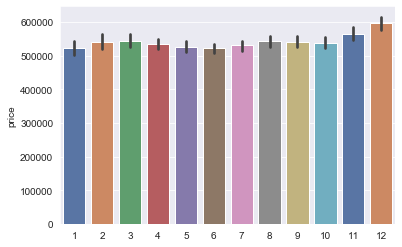

In [22]:
sns.barplot(x=sorted(df['month']), y=df['price'], palette="deep")

Make month_year into a tuple?

In [23]:
for date in df['month_year']:
    new_list = []
    

### Field - "price"

In [24]:
print(df['price'].max())
print(df['price'].min())
print(type(df['price'][0]))

7700000.0
78000.0
<class 'numpy.float64'>


Place into bins of 10,000? & divide everything by 1000?

In [25]:
"""Sort out the bins"""
labels = ["{0}k - {1}k".format(i, i+9) for i in range(70, 800, 10)

price_band = pd.qcut(df['price'], range(70000, 800000, 10000), right=False, labels=labels)

df.head(10)

SyntaxError: invalid syntax (<ipython-input-25-76a4b2d95017>, line 4)

### Bedrooms

Obvious what this represents.

In [26]:
sorted(df['bedrooms'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]

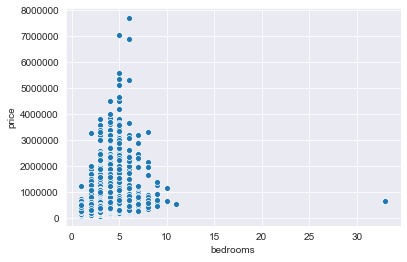

In [27]:
sns.scatterplot(data = df, x=df['bedrooms'], y=df['price'])

The property that has 33 bedrooms will be removed as this is probably an error. 

In [28]:
df.loc[(df['bedrooms'] == 33)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,month_year
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,0.0,98103,47.6878,-122.331,1330,4700,2014,6,25,25-2014


In [29]:
df.loc[df['bedrooms'] == 3, ['price']].median()

price    413000.0
dtype: float64

### Bathrooms

This se is rating is done by a value of 1 is equal to a full bathroom contains four key items: a bathtub, a shower, a toilet, and a sink with running water. Each having a constiuant value of 0.25 

-> suggestion is to multiply each value by 4, then convert to an integer?

In [30]:
sorted(df['bathrooms'].unique()) # range = 0.5 -> 8.0

[0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 5.25,
 5.5,
 5.75,
 6.0,
 6.25,
 6.5,
 6.75,
 7.5,
 7.75,
 8.0]

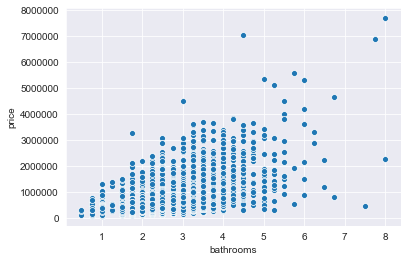

In [31]:
sns.scatterplot(data = df, x=df['bathrooms'], y=df['price'])

### Field - sqft_living


In [32]:
print(df['sqft_living'].max())
print(df['sqft_living'].min())

13540
370


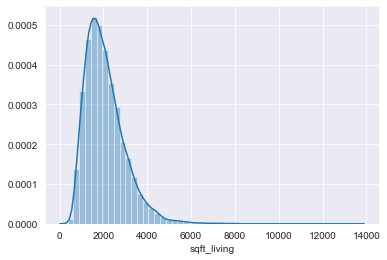

In [33]:
sns.distplot(df['sqft_living'])

### Field - sqft_living15
this is the average square_ft for the surounding house.  

In [34]:
print(df['sqft_living15'].max())
print(df['sqft_living15'].min())

6210
399


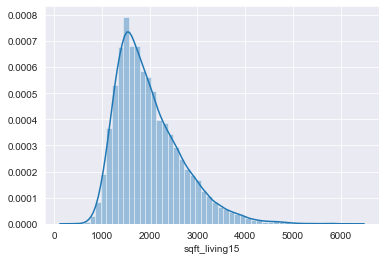

In [35]:
sns.distplot(df['sqft_living15'])

### Field - sqft_lot

In [36]:
print(df['sqft_lot'].max())
print(df['sqft_lot'].min())

1651359
520


### Field - sqft_lot15

In [37]:
print(df['sqft_lot15'].max())
print(df['sqft_lot15'].min())

871200
651


###  Field - "waterfront"  

In [38]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [39]:
df['waterfront'].count()

19221

In [40]:
df.loc[df['waterfront'] == 1, ['waterfront']].count()

waterfront    146
dtype: int64

In [41]:
((df['waterfront'].isna().sum()) / (df['waterfront'].count()))*100

12.36147963165288

There are only 146 properits with a water front the, 12% of the sample. Therefore convert the Null values to 0. i.e. not a waterfront property.

In [42]:
df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'].unique()

array([0., 1.])

### Field - "view"

In [43]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [44]:
df['view'].sum()

5036.0

In [45]:
view_percent_na = ((df['view'].isna().sum()) / (df['view'].count()))*100
view_percent_na

0.2925606018389524

Base on the very low percentage and the nature of the field being a rating out of 5. We will op for the method of convertion the null values to the median of the field.

In [46]:
df['view'].median()

0.0

In [47]:
df['view'] = df['view'].fillna(0)

In [48]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

Yeah we can see that we have sorted out the null values in the "view" field.

### Field - condition

In [49]:
sorted(df['condition'].unique())

[1, 2, 3, 4, 5]

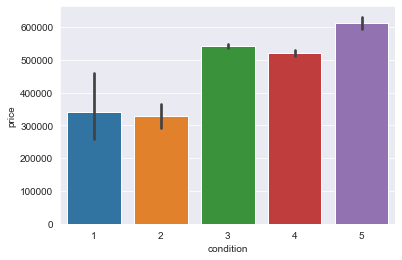

In [50]:
sns.barplot(data= df, x=df['condition'], y=df['price'])

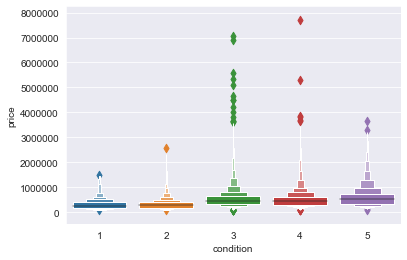

In [51]:
sns.boxenplot(data= df, x=df['condition'], y=df['price'])

### Field - grade

In [52]:
sorted(df['grade'].unique())

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Plot the price distrobution by grade

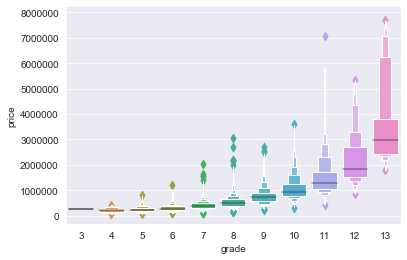

In [53]:
sns.boxenplot(data= df, x=df['grade'], y=df['price'])

### Field - "sqft_above"

In [54]:
print(df['sqft_above'].max())
print(df['sqft_above'].min())
type(df['sqft_above'][0])

9410
370


numpy.int64

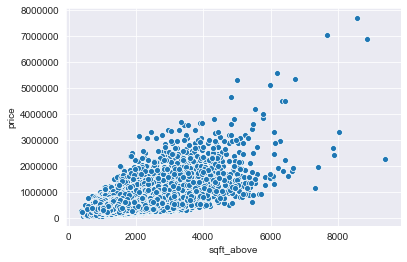

In [55]:
sns.scatterplot(data=df, x=df['sqft_above'], y=df['price'])

### Field - "sqft_basement"

In [56]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

There is a value of "?" as a bacement squar foot. 

In [57]:
df.loc[df['sqft_basement'] == "?", ['sqft_basement']].count()

sqft_basement    454
dtype: int64

Converet the "?" to zero

In [58]:
df.loc[(df['sqft_basement'] == "?")] = 0.0

Convert all valuse to floats

In [62]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [63]:
house_with_basement = df.loc[df['sqft_basement'] >0, ['sqft_basement', 'price']]
house_with_basement.head()

,sqft_basement,price
1,400.0,538000.0
3,910.0,604000.0
5,1530.0,1230000.0
8,730.0,229500.0
10,1700.0,662500.0


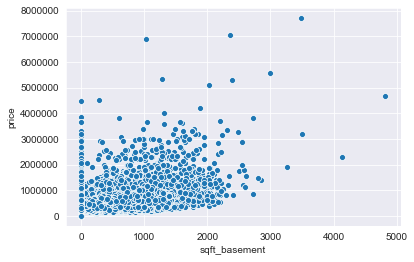

In [64]:
sns.scatterplot(x = df['sqft_basement'], y=df['price'], data=df)

Will conver to basement sqft > 0

### Field - "yr_built"

In [65]:
df['yr_built'].unique()

array([1955., 1951., 1933., 1965., 1987., 2001.,    0., 1963., 1960.,
       2003., 1942., 1927., 1977., 1900., 1979., 1994., 1916., 1969.,
       1947., 1968., 1995., 1985., 1941., 1915., 1909., 1948., 2005.,
       1929., 1981., 1930., 1904., 1996., 2000., 1984., 1922., 1959.,
       1966., 1953., 1950., 2008., 1991., 1954., 1973., 2014., 1925.,
       1989., 1972., 1986., 1956., 1992., 1964., 1952., 1961., 2006.,
       1988., 1962., 1939., 1946., 1967., 1975., 1980., 1910., 1983.,
       1978., 1905., 1971., 2010., 1945., 1924., 1990., 1914., 1926.,
       2004., 1923., 2007., 1976., 1949., 1999., 1901., 1993., 1920.,
       1997., 1943., 1957., 1940., 1918., 1928., 1974., 1911., 1936.,
       1937., 1982., 1908., 1931., 2002., 1998., 1913., 1921., 2013.,
       1907., 1958., 2012., 1912., 2011., 1917., 1932., 1944., 1902.,
       2009., 1903., 1970., 2015., 1934., 1938., 1919., 1906., 1935.])

In [66]:
yr_built_zn = df.loc[df['yr_built'] > 0, ['yr_built']]

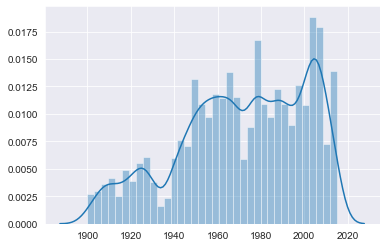

In [67]:
sns.distplot(yr_built_zn)

In [68]:
yr_built_if_ren = df.loc[df['yr_renovated'] != 0, ['yr_built']]

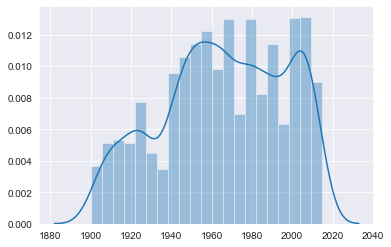

In [69]:
sns.distplot(yr_built_if_ren)

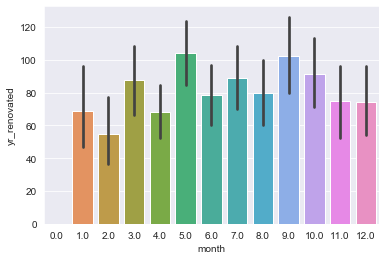

In [70]:
sns.barplot(data = df, x=df['month'], y=df['yr_renovated'])

### Field - yr_renovated

In [71]:
print(df['yr_renovated'].max())
print(df['yr_renovated'].min())
print(type(df['yr_renovated'][0]))

2015.0
0.0
<class 'numpy.float64'>


In [72]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 2001., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

This is a removation year. If Null we will set to zero, as if not renovated = 0

In [73]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 1980., 1971., 1979., 1997.,
       1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968., 2012.,
       1963., 1951., 1962., 2001., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1975., 1964., 1973., 1957., 1959., 1960.,
       1967., 1965., 1934., 1972., 1944., 1958.])

In [74]:
type(df['yr_renovated'][0])

numpy.float64

In [75]:
df['yr_']

KeyError: 'yr_'

In [ ]:
df['yr_renovated'].count()

In [76]:
df.loc[df['yr_built'] == 0, ['yr_built']].count()

yr_built    454
dtype: int64

In [77]:
yr_renovated_notzero = df.loc[df['yr_renovated'] > 0, ['yr_renovated']]

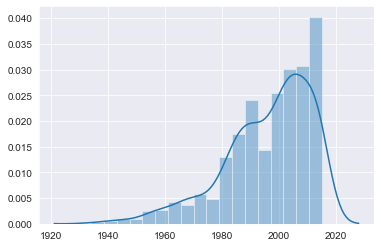

In [78]:
sns.distplot(yr_renovated_notzero)

### Field - zipcode

In [79]:
df['zipcode'].unique()

array([98178., 98125., 98028., 98136., 98074., 98053.,     0., 98198.,
       98146., 98038., 98007., 98115., 98107., 98126., 98019., 98103.,
       98003., 98133., 98040., 98092., 98030., 98002., 98119., 98112.,
       98052., 98027., 98117., 98058., 98001., 98056., 98166., 98023.,
       98070., 98148., 98105., 98042., 98008., 98059., 98122., 98144.,
       98004., 98005., 98034., 98075., 98116., 98118., 98199., 98032.,
       98045., 98102., 98077., 98108., 98168., 98177., 98065., 98029.,
       98006., 98109., 98022., 98033., 98155., 98024., 98011., 98031.,
       98010., 98106., 98072., 98188., 98014., 98055., 98039.])

In [80]:
df['zipcode'] = df['zipcode'].astype(int)

In [81]:
zipcode_count = counter(df['zipcode'])
zipcode_count[:3]

[(98103, 588), (98038, 574), (98115, 568)]

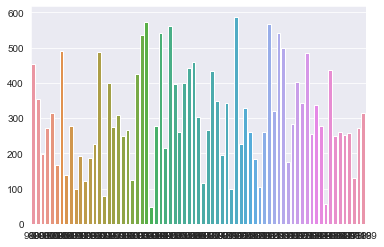

In [82]:
def plot_bar_count(data):
    x = []
    y = []
    for d in data:
        x.append(d[0])
        y.append(d[1])
    return sns.barplot(x=x,y=y)
    
plot_bar_count(zipcode_count)

### Field - "lat" & "long"

Turn this into a location tuple.

In [83]:
df['location'] = list(zip(df['lat'], df['long']))

In [84]:
df['location'][:5]

0               (47.5112, -122.257)
1    (47.721000000000004, -122.319)
2    (47.7379, -122.23299999999999)
3    (47.5208, -122.39299999999999)
4               (47.6168, -122.045)
Name: location, dtype: object

In [85]:
df.to_csv ('kc_house_data_clean.csv')